In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import cross_validate
from numpy import mean
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv("combined_prices.csv",index_col=0)
df.head()

,player_name,Preço (milhão de euro),País de Origem,Age,id,matchId,matchPeriod,minute,second,relatedEventId,SeasonID,SeasonName,MatchName,MatchDateUTC,location_x,location_y,team_id,team_name,team_formation,opponentTeam_id,opponentTeam_name,opponentTeam_formation,player_id,player_position,type_primary,type_secondary,pass_accurate,pass_angle,pass_height,pass_length,pass_recipient_id,pass_recipient_name,pass_recipient_position,shot_bodyPart,shot_isGoal,shot_onTarget,shot_goalZone,shot_xg,shot_postShotXg,shot_goalkeeperActionId,shot_goalkeeper_id,shot_goalkeeper_name,groundDuel_duelType,groundDuel_keptPossession,groundDuel_progressedWithBall,groundDuel_stoppedProgress,groundDuel_recoveredPossession,groundDuel_takeOn,groundDuel_side,groundDuel_relatedDuelId,groundDuel_opponent_id,groundDuel_opponent_name,groundDuel_opponent_position,aerialDuel_firstTouch,aerialDuel_height,aerialDuel_relatedDuelId,aerialDuel_opponent_id,aerialDuel_opponent_name,aerialDuel_opponent_position,aerialDuel_opponent_height,infraction_yellowCard,infraction_redCard,infraction_type,infraction_opponent_id,infraction_opponent_name,infraction_opponent_position,carry_progression,possession_id,possession_duration,possession_types,possession_eventsNumber,possession_eventIndex,possession_startLocation_x,possession_startLocation_y,possession_endLocation_x,possession_endLocation_y,possession_team_id,possession_team_name,possession_team_formation,possession_attack_withShot,possession_attack_withShotOnGoal,possession_attack_withGoal,possession_attack_flank,possession_attack_xg,pass_carry_endLocation_x,pass_carry_endLocation_y,goal,own_goal,success_flg,match_second,xT,teamgoal_prob,oppgoal_prob,teamgoal_prob_after_action,oppgoal_prob_after_action,next_play_state,direct_teamgoal_prob,direct_oppgoal_prob
0,k. niemczycki,1200,Poland,23,1151704954,5233222,1H,9,54,1151704955.000,186215,2021\/2022,"Śląsk Wrocław - Cracovia Kraków, 0-2",2021-12-18 16:30:00,7.350,27.880,13521,Cracovia Kraków,3-4-3,13536,Śląsk Wrocław,3-4-2-1,513224,GK,touch,['carry'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.270,1151704950.000,142.175,[],13.000,2.000,11.550,27.200,73.500,0.000,13521.000,Cracovia Kraków,3-4-3,NaN,NaN,NaN,NaN,NaN,22.050,23.800,False,False,True,594,0.000,0.004,0.008,0.004,0.004,03_04_open_team,0.000,0.000
1,k. niemczycki,1200,Poland,23,1151704955,5233222,1H,10,3,1151704928.000,186215,2021\/2022,"Śląsk Wrocław - Cracovia Kraków, 0-2",2021-12-18 16:30:00,22.050,23.800,13521,Cracovia Kraków,3-4-3,13536,Śląsk Wrocław,3-4-2-1,513224,GK,pass,"['forward_pass', 'long_pass', 'loss']",0.000,-11.000,high,35.000,99446.000,K. Mączyński,RCMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1151704950.000,142.175,[],13.000,3.000,11.550,27.200,73.500,0.000,13521.000,Cracovia Kraków,3-4-3,NaN,NaN,NaN,NaN,NaN,56.700,30.600,False,False,True,603,0.004,0.004,0.004,0.008,0.002,07_04_open_team,0.000,0.000
2,k. niemczycki,1200,Poland,23,1151704982,5233222,1H,11,33,1151704965.000,186215,2021\/2022,"Śląsk Wrocław - Cracovia Kraków, 0-2",2021-12-18 16:30:00,11.550,48.960,13521,Cracovia Kraków,3-4-3,13536,Śląsk Wrocław,3-4-2-1,513224,GK,pass,"['forward_pass', 'long_pass', 'loss', 'progres...",0.000,-22.000,high,37.000,99446.000,K. Mączyński,RCMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1151704979.000,12.144,['transition_medium'],4.000,3.000,54.600,44.200,46.200,63.240,13521.000,Cracovia Kraków,3-4-3,NaN,NaN,NaN,NaN,NaN,46.200,63.240,False,False,False,693,-0.001,0.003,0.009,0.002,0.008,07_11_open_opp,0.000,0.000
3,k. niemczycki,1200,Poland,23,1151705012,5233222,1H,12,40,1151705014.000,186215,2021\/2022,"Śląsk Wrocław - Cracovia Kraków, 0-2",2021-12-18 16:30:00,0.000,29.920,13521,Cracovia Kraków,3-4-3,13536,Śląsk W

In [3]:
len(df)

296621

In [4]:
df_ido=df.groupby(["player_name","matchId"]).agg(
kezdes=("minute",min),
vege=("minute",max)    
)


In [5]:
df_ido.loc[df_ido["kezdes"]<10,"kezdes"]=0

In [6]:
df_ido["playtime"]=df_ido["vege"]-df_ido["kezdes"]

In [7]:
minutes=df_ido.groupby("player_name").sum("playtime").reset_index().drop(["kezdes","vege"],axis=1)

In [8]:
minutes.loc[minutes["playtime"]==0,"playtime"]=1

In [9]:
df.head()

,player_name,Preço (milhão de euro),País de Origem,Age,id,matchId,matchPeriod,minute,second,relatedEventId,SeasonID,SeasonName,MatchName,MatchDateUTC,location_x,location_y,team_id,team_name,team_formation,opponentTeam_id,opponentTeam_name,opponentTeam_formation,player_id,player_position,type_primary,type_secondary,pass_accurate,pass_angle,pass_height,pass_length,pass_recipient_id,pass_recipient_name,pass_recipient_position,shot_bodyPart,shot_isGoal,shot_onTarget,shot_goalZone,shot_xg,shot_postShotXg,shot_goalkeeperActionId,shot_goalkeeper_id,shot_goalkeeper_name,groundDuel_duelType,groundDuel_keptPossession,groundDuel_progressedWithBall,groundDuel_stoppedProgress,groundDuel_recoveredPossession,groundDuel_takeOn,groundDuel_side,groundDuel_relatedDuelId,groundDuel_opponent_id,groundDuel_opponent_name,groundDuel_opponent_position,aerialDuel_firstTouch,aerialDuel_height,aerialDuel_relatedDuelId,aerialDuel_opponent_id,aerialDuel_opponent_name,aerialDuel_opponent_position,aerialDuel_opponent_height,infraction_yellowCard,infraction_redCard,infraction_type,infraction_opponent_id,infraction_opponent_name,infraction_opponent_position,carry_progression,possession_id,possession_duration,possession_types,possession_eventsNumber,possession_eventIndex,possession_startLocation_x,possession_startLocation_y,possession_endLocation_x,possession_endLocation_y,possession_team_id,possession_team_name,possession_team_formation,possession_attack_withShot,possession_attack_withShotOnGoal,possession_attack_withGoal,possession_attack_flank,possession_attack_xg,pass_carry_endLocation_x,pass_carry_endLocation_y,goal,own_goal,success_flg,match_second,xT,teamgoal_prob,oppgoal_prob,teamgoal_prob_after_action,oppgoal_prob_after_action,next_play_state,direct_teamgoal_prob,direct_oppgoal_prob
0,k. niemczycki,1200,Poland,23,1151704954,5233222,1H,9,54,1151704955.000,186215,2021\/2022,"Śląsk Wrocław - Cracovia Kraków, 0-2",2021-12-18 16:30:00,7.350,27.880,13521,Cracovia Kraków,3-4-3,13536,Śląsk Wrocław,3-4-2-1,513224,GK,touch,['carry'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.270,1151704950.000,142.175,[],13.000,2.000,11.550,27.200,73.500,0.000,13521.000,Cracovia Kraków,3-4-3,NaN,NaN,NaN,NaN,NaN,22.050,23.800,False,False,True,594,0.000,0.004,0.008,0.004,0.004,03_04_open_team,0.000,0.000
1,k. niemczycki,1200,Poland,23,1151704955,5233222,1H,10,3,1151704928.000,186215,2021\/2022,"Śląsk Wrocław - Cracovia Kraków, 0-2",2021-12-18 16:30:00,22.050,23.800,13521,Cracovia Kraków,3-4-3,13536,Śląsk Wrocław,3-4-2-1,513224,GK,pass,"['forward_pass', 'long_pass', 'loss']",0.000,-11.000,high,35.000,99446.000,K. Mączyński,RCMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1151704950.000,142.175,[],13.000,3.000,11.550,27.200,73.500,0.000,13521.000,Cracovia Kraków,3-4-3,NaN,NaN,NaN,NaN,NaN,56.700,30.600,False,False,True,603,0.004,0.004,0.004,0.008,0.002,07_04_open_team,0.000,0.000
2,k. niemczycki,1200,Poland,23,1151704982,5233222,1H,11,33,1151704965.000,186215,2021\/2022,"Śląsk Wrocław - Cracovia Kraków, 0-2",2021-12-18 16:30:00,11.550,48.960,13521,Cracovia Kraków,3-4-3,13536,Śląsk Wrocław,3-4-2-1,513224,GK,pass,"['forward_pass', 'long_pass', 'loss', 'progres...",0.000,-22.000,high,37.000,99446.000,K. Mączyński,RCMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1151704979.000,12.144,['transition_medium'],4.000,3.000,54.600,44.200,46.200,63.240,13521.000,Cracovia Kraków,3-4-3,NaN,NaN,NaN,NaN,NaN,46.200,63.240,False,False,False,693,-0.001,0.003,0.009,0.002,0.008,07_11_open_opp,0.000,0.000
3,k. niemczycki,1200,Poland,23,1151705012,5233222,1H,12,40,1151705014.000,186215,2021\/2022,"Śląsk Wrocław - Cracovia Kraków, 0-2",2021-12-18 16:30:00,0.000,29.920,13521,Cracovia Kraków,3-4-3,13536,Śląsk W

In [10]:
def training(train, test, model, encoder, scaler=None, imputer='zero'):
    x_train = train.drop(['Value'],axis=1)
    y_train = train.Value
    x_test = test.drop(['Value'],axis=1)
    y_test = test.Value

    pipe = Pipeline(steps=[
        ("encoder", encoder),
        ("scaler", scaler),
        ("Model", model)
    ])
    pipe.fit(x_train, y_train)
    preds = pipe.predict(x_test)
    r2 = r2_score(y_test, preds)
    mse=mean_squared_error(y_test,preds)
    mae=mean_absolute_error(y_test,preds)
    
    metric_dict = {'MSE':mse, 'R2':r2,'MAE':mae}
    metric_dict=pd.DataFrame([metric_dict])
    
    return(metric_dict)

In [11]:
def evaluate_model(df, model, encoder=None, scaler=None):
    rand_state = 42
    y = df['Value']
    X = df.drop(['Value'], axis = 1)
    df = df.fillna(0)
    skf = KFold(n_splits=5)
    metric_df = pd.DataFrame(columns=['MSE', 'R2','MAE'])
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    # pipe = Pipeline(steps=[
    #     ("encoder", encoder),
    #     ("scaler", scaler),
    #     ("Model", model)
    # ])
    # pipe.fit(X_train, y_train)
    # preds = pipe.predict(X_test)
    # r2 = r2_score(y_test, preds)
    # mse=mean_squared_error(y_test,preds)
    # mae=mean_absolute_error(y_test,preds)
    # metric_dict = {'MSE':mse, 'R2':r2,'MAE':mae}
    # metric_dict=pd.DataFrame([metric_dict])
    fold_no = 1
    for train_index,test_index in skf.split(X, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        metric_dict = training(train, test, model, encoder, scaler)
        metric_df = pd.concat([metric_df, metric_dict], ignore_index=True)
        fold_no += 1

    means = metric_df.mean()
    metric_df = pd.DataFrame(columns = means.index)
    metric_df.loc[len(metric_df)] = means.values
    return(metric_df)

In [12]:
def high(df):
    if df=='high':
        return 1
    else:
        return 0
df["pass_is_high"]=df["pass_height"].apply(high)


def ispass(df):
    if df=='pass':
        return 1
    else:
        return 0

In [13]:
df['ispass']=df['type_primary'].apply(ispass)

In [14]:
df['headerGoal']=np.where((df['shot_bodyPart']=='head_or_other') &(df['shot_isGoal']==True),1,0)

In [15]:
df['leftfootGoal']=np.where((df['shot_bodyPart']=='left_foot') &(df['shot_isGoal']==True),1,0)

In [16]:
df['righfootGoal']=np.where((df['shot_bodyPart']=='right_foot') &(df['shot_isGoal']==True),1,0)

In [17]:
df[df["type_primary"]=="duel"].head()

,player_name,Preço (milhão de euro),País de Origem,Age,id,matchId,matchPeriod,minute,second,relatedEventId,SeasonID,SeasonName,MatchName,MatchDateUTC,location_x,location_y,team_id,team_name,team_formation,opponentTeam_id,opponentTeam_name,opponentTeam_formation,player_id,player_position,type_primary,type_secondary,pass_accurate,pass_angle,pass_height,pass_length,pass_recipient_id,pass_recipient_name,pass_recipient_position,shot_bodyPart,shot_isGoal,shot_onTarget,shot_goalZone,shot_xg,shot_postShotXg,shot_goalkeeperActionId,shot_goalkeeper_id,shot_goalkeeper_name,groundDuel_duelType,groundDuel_keptPossession,groundDuel_progressedWithBall,groundDuel_stoppedProgress,groundDuel_recoveredPossession,groundDuel_takeOn,groundDuel_side,groundDuel_relatedDuelId,groundDuel_opponent_id,groundDuel_opponent_name,groundDuel_opponent_position,aerialDuel_firstTouch,aerialDuel_height,aerialDuel_relatedDuelId,aerialDuel_opponent_id,aerialDuel_opponent_name,aerialDuel_opponent_position,aerialDuel_opponent_height,infraction_yellowCard,infraction_redCard,infraction_type,infraction_opponent_id,infraction_opponent_name,infraction_opponent_position,carry_progression,possession_id,possession_duration,possession_types,possession_eventsNumber,possession_eventIndex,possession_startLocation_x,possession_startLocation_y,possession_endLocation_x,possession_endLocation_y,possession_team_id,possession_team_name,possession_team_formation,possession_attack_withShot,possession_attack_withShotOnGoal,possession_attack_withGoal,possession_attack_flank,possession_attack_xg,pass_carry_endLocation_x,pass_carry_endLocation_y,goal,own_goal,success_flg,match_second,xT,teamgoal_prob,oppgoal_prob,teamgoal_prob_after_action,oppgoal_prob_after_action,next_play_state,direct_teamgoal_prob,direct_oppgoal_prob,pass_is_high,ispass,headerGoal,leftfootGoal,righfootGoal
79,k. niemczycki,1200,Poland,23,1139267794,5233198,2H,87,9,1139267797.000,186215,2021\/2022,"Cracovia Kraków - Legia Warszawa, 1-0",2021-12-05 19:00:00,7.350,34.680,13521,Cracovia Kraków,3-4-3,13505,Legia Warszawa,4-1-4-1,513224,GK,duel,"['aerial_duel', 'recovery', 'carry']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,189.000,1139268775.000,284710.000,Yuri Ribeiro,LB,175.000,NaN,NaN,NaN,NaN,NaN,NaN,10.870,1139267794.000,45.620,['transition_low'],13.000,0.000,7.350,34.680,73.500,54.400,13521.000,Cracovia Kraków,3-4-3,NaN,NaN,NaN,NaN,NaN,18.900,44.880,False,False,True,5229,0.000,0.004,0.008,0.004,0.006,02_07_open_team,0.000,0.000,0,0,0,0,0
223,k. niemczycki,1200,Poland,23,920543894,5140353,1H,29,53,920543895.000,187453,2020\/2021,"Cracovia Kraków - Warta Poznań, 0-1",2021-05-16 15:30:00,6.300,29.240,13521,Cracovia Kraków,4-1-4-1,13545,Warta Poznań,4-1-4-1,513224,GK,duel,['aerial_duel'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,189.000,920543951.000,544521.000,M. Nawrocki,RCB,185.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,920547458.000,14.128,[],9.000,2.000,7.350,27.200,0.000,68.000,13521.000,Cracovia Kraków,4-1-4-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,1793,0.001,0.003,0.016,0.004,0.005,03_01_open_team,0.000,0.005,0,0,0,0,0
254,k. niemczycki,1200,Poland,23,905336564,5140330,2H,91,52,905338346.000,187453,2020\/2021,"Cracovia Kraków - Górnik Zabrze, 1-0",2021-05-03 15:30:00,5.250,32.640,13521,Cracovia Kraków,4-2-3-1,13512,Górnik Zabrze,3-4-2-1,513224,GK,duel,"['aerial_duel', 'carry']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,189.000,905338572.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.204,905336563.000,21.802,[],7.000,2.000,4.200,33.320,70.350,23.120,13521.000,Cracovia Kraków,4-2-3-1,NaN,NaN,NaN,NaN,NaN,13.650,27.880,False,False,True,5512,0.001,0.003,0.016,0.005,0.006,02_04_open_team,0.000,0.005,0,0,0,0,0
319,k. niemczycki,1200,Poland,23,868578811,5140290,1H,16,28,868579951.000,187453,2020\/2021,"Cracovia Krak

In [18]:
defenders=["LB","RB","RCB","LCB","RWB","LCB3","RCB3","CB","LWB","LB5","RB5"]
midfielders=["LCMF","AMF","RCMF","DMF","LDMF","LAMF","RDMF","RAMF","LCMF3","RCMF3"]
attackers=["CF","LW","RW","LWF","RWF","SS"]

In [19]:
df_grouped=df.groupby('player_name').agg(
    Value=('Preço (milhão de euro)','mean'),
    country=('País de Origem','max'),
    goals=('shot_isGoal','sum'),
    xG=('shot_xg','sum'),
    pSxG=('shot_postShotXg','sum'),
    #own_goal=('own_goal','sum'),
    xT=('xT','sum'),
    position=('player_position', lambda x: pd.Series.mode(x)[0]),
    #takeon=('groundDuel_takeOn','sum'),
    pass_lenght=('pass_length','mean'),
    #high_passes=('pass_is_high','sum'),
    team=('team_id','max'),
    passes=('ispass','sum'),
    #successful_pass=('pass_accurate','sum'),
    tackles=('groundDuel_recoveredPossession','sum'),
    #yellowcards=('infraction_yellowCard','sum'),
    redcards=('infraction_redCard','sum'),
    #actions=('player_name','count'),
    age=("Age",'mean'),
    shots=("shot_xg","count"),
    #left_f=("leftfootGoal","sum"),
    #right_f=("righfootGoal","sum"),
    #header=("headerGoal","sum"),
    #aerialduel=("aerialDuel_firstTouch","count")
)
df_grouped.reset_index(inplace=True)
df_grouped=pd.merge(df_grouped,minutes,on='player_name',how="inner")
df_grouped['position_code']=np.where((df_grouped['position']=="GK"),0,np.where(df_grouped['position'].isin(defenders),1,np.where(df_grouped['position'].isin(midfielders),2,np.where(df_grouped['position'].isin(attackers),3,4))))
#Exclude goalkeepers as there are no relevant stats for them
df_grouped=df_grouped.loc[df_grouped['position_code']!=0]

In [20]:
df_grouped['Country_code']=preprocessing.LabelEncoder().fit_transform(df_grouped['country'])
#df_grouped['Position_code']=preprocessing.LabelEncoder().fit_transform(df_grouped['position'])


#per90
#position osszevonas
df_grouped.reset_index(drop=True,inplace=True)
#df_grouped['shot_acc']=df_grouped['xG']-df_grouped["pSxG"]
#df_grouped['pass_acc']=df_grouped['successful_pass']/df_grouped["passes"]
#df_grouped['xT/90']=df_grouped['xT']/df_grouped['playtime']
df_grouped['xG/shot']=df_grouped['xG']/df_grouped["shots"]
#df_grouped["xT/passes"]=df_grouped["xT"]/(df_grouped["passes"]+1)
#df_grouped['xG/90']=df_grouped['xG']/df_grouped["playtime"]
df_grouped["shot/90"]=df_grouped["shots"]/df_grouped["playtime"]
df_grouped["pass/90"]=df_grouped["passes"]/df_grouped["playtime"]
df_grouped['goals/shots']=df_grouped['goals']/df_grouped['shots']
df_grouped
df_modeller=df_grouped.drop(["country","pSxG","position",'xG','passes','goals','player_name','playtime'],axis=1).fillna(0).copy()
#df_modeller=df_grouped.drop(["country","position"],axis=1).copy()

<Axes: >

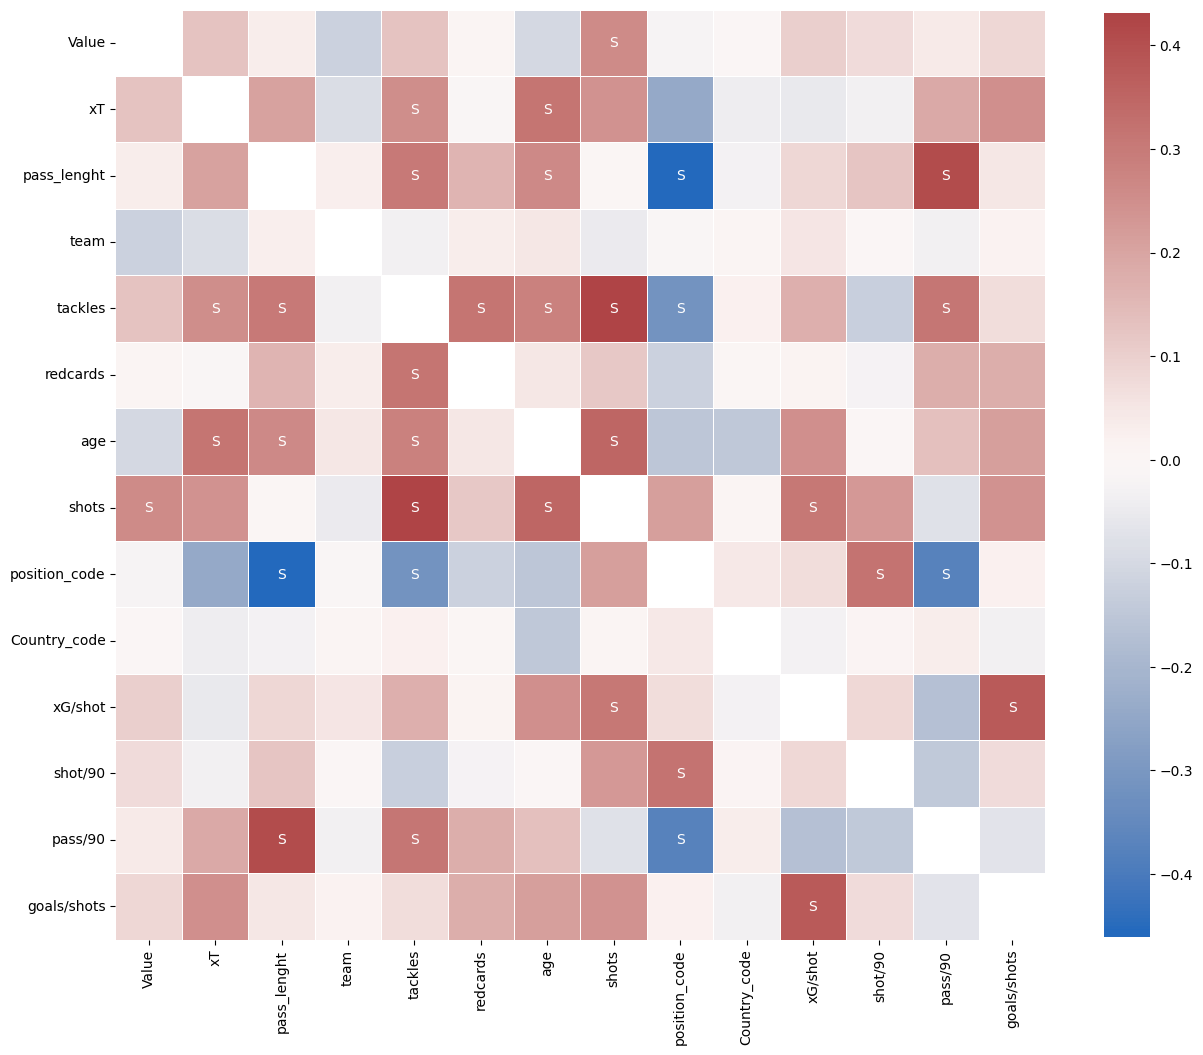

In [21]:
#Feature correlation

# Computes feature correlation
df_corr = df_modeller.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "H",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "S", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

In [22]:
df_grouped.loc[df_grouped["Value"]==df_grouped.Value.max()]

,player_name,Value,country,goals,xG,pSxG,xT,position,pass_lenght,team,passes,tackles,redcards,age,shots,playtime,position_code,Country_code,xG/shot,shot/90,pass/90,goals/shots
211,m. skoras,6000.000,Poland,3.000,4.934,4.234,1.058,RAMF,18.109,13510,752,14.000,0.000,23.000,45,2153,2,19,0.110,0.021,0.349,0.067


In [23]:
model=LinearRegression()
scaler=preprocessing.StandardScaler()
evaluate_model(df_modeller,model,scaler=None)

,MSE,R2,MAE
0,311769.033,0.008,340.290


In [24]:
model=GradientBoostingRegressor(learning_rate=0.03,random_state=42,max_depth=8,min_samples_leaf=32)
evaluate_model(df_modeller,model,scaler=None)

,MSE,R2,MAE
0,282632.282,0.141,312.192


In [27]:
print(model.feature_importances_)
df_modeller.columns

[0.06181939 0.01658104 0.22330251 0.03295891 0.         0.18052262
 0.29773807 0.         0.         0.04528708 0.0571702  0.07129859
 0.01332159]


Index(['Value', 'xT', 'pass_lenght', 'team', 'tackles', 'redcards', 'age',
       'shots', 'position_code', 'Country_code', 'xG/shot', 'shot/90',
       'pass/90', 'goals/shots'],
      dtype='object')

In [100]:
model=KNeighborsRegressor(n_neighbors=90)
evaluate_model(df_modeller,model,scaler=None)

,MSE,R2,MAE
0,322402.324,0.026,334.730


In [71]:
model=SVR()
evaluate_model(df_modeller,model,scaler=None)

,MSE,R2,MAE
0,362126.360,-0.090,317.701


In [104]:
model=BayesianRidge()
evaluate_model(df_modeller,model,scaler=None)

,MSE,R2,MAE
0,304838.911,0.080,328.834


In [108]:
model=KernelRidge()
evaluate_model(df_modeller,model)

,MSE,R2,MAE
0,307203.360,0.041,332.408


In [111]:
model=RandomForestRegressor(criterion="poisson",random_state=42,min_samples_leaf=30)
evaluate_model(df_modeller,model)

,MSE,R2,MAE
0,304407.577,0.061,330.437


In [121]:
from sklearn.ensemble import VotingRegressor

reg1 = SVR()
reg2 = KNeighborsRegressor(n_neighbors=60)
reg3 = GradientBoostingRegressor(random_state=42,min_samples_leaf=32,max_depth=5)
reg4=KernelRidge()
reg5 = RandomForestRegressor(random_state=42,min_samples_leaf=32,criterion="squared_error")
ereg = VotingRegressor(estimators=[('dt', reg1), ('xg', reg2), ('lr', reg3),('rf',reg4),('reg5',reg5)])

evaluate_model(df_modeller,ereg)

,MSE,R2,MAE
0,294878.951,0.124,305.299


In [110]:
df_modeller.Value.mean()

509.3962585034014

In [111]:
df_modeller.Value.max()

6000.0